# Adriann Liceralde
# Combine CSV - Binary

## Select Directory

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

#user = 'adria'
user = 'Adriann Liceralde'
#user = 'adria\\OneDrive'
#subfolder = 'V 2.2.3 Lot'
subfolder = 'Roof-Primary'
#os.chdir('C:\\Users\\'+str(user)+'\\Desktop\\Repository\\WirelessSensorNetwork\\Data\\'
#         + str(subfolder))
#os.chdir('C:\\Users\\'+str(user)+'\\Desktop')
os.chdir('C:\\Users\\'+str(user)+'\\Desktop\\'+str(subfolder))
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
all_filenames

['2021-07-06--00.csv',
 '2021-07-06--20.csv',
 '2021-07-06--21.csv',
 '2021-07-06--22.csv',
 '2021-07-06--23.csv',
 '2021-07-07--00.csv',
 '2021-07-07--01.csv',
 '2021-07-07--02.csv',
 '2021-07-07--03.csv',
 '2021-07-07--04.csv',
 '2021-07-07--05.csv',
 '2021-07-07--06.csv',
 '2021-07-07--07.csv',
 '2021-07-07--08.csv',
 '2021-07-07--09.csv',
 '2021-07-07--10.csv',
 '2021-07-07--11.csv',
 '2021-07-07--12.csv',
 '2021-07-07--13.csv',
 '2021-07-07--14.csv',
 '2021-07-07--15.csv',
 '2021-07-07--16.csv',
 '2021-07-07--17.csv',
 '2021-07-07--18.csv',
 '2021-07-07--19.csv',
 '2021-07-07--20.csv',
 '2021-07-07--21.csv',
 '2021-07-07--22.csv',
 '2021-07-07--23.csv',
 '2021-07-08--00.csv',
 '2021-07-08--01.csv',
 '2021-07-08--02.csv',
 '2021-07-08--03.csv',
 '2021-07-08--04.csv',
 '2021-07-08--05.csv',
 '2021-07-08--06.csv',
 '2021-07-08--07.csv',
 '2021-07-08--08.csv',
 '2021-07-08--09.csv',
 '2021-07-08--10.csv',
 '2021-07-08--11.csv',
 '2021-07-08--12.csv',
 '2021-07-08--13.csv',
 '2021-07-0

## Process Binary Data

In [8]:
allUnixTime = np.array([])
allWindCyc  = np.array([])
allWindDir  = np.array([])
allConcData = np.array([])
allTempData = np.array([])

for each in all_filenames:
    f = open(each, "rb")
    filesize   = int(os.path.getsize(each))
    headersize = 0
    lines      = (filesize-headersize)//10

    print('File :' , each, '\n', 'Bytes:' , filesize, '\n', 'Lines:' , lines)
    first   = False
    counter = 0
    
    for i in range(lines):
        if (first == False) and headersize > 0:
            filler = str(f.read(headersize), 'utf-8')
            first  = True
        unix = int.from_bytes(f.read(4), byteorder='big')
        ws   = int.from_bytes(f.read(1), byteorder='big')
        wd   = int.from_bytes(f.read(2), byteorder='big')
        co2  = int.from_bytes(f.read(2), byteorder='big')
        temp = int.from_bytes(f.read(1), byteorder='big')
        allUnixTime = np.append(allUnixTime, str(unix))
        allWindCyc  = np.append(allWindCyc, ws)
        allWindDir  = np.append(allWindDir,   wd)
        allConcData = np.append(allConcData, co2)
        allTempData = np.append(allTempData, temp)

File : 2021-07-06--00.csv 
 Bytes: 300 
 Lines: 30
File : 2021-07-06--20.csv 
 Bytes: 12200 
 Lines: 1220
File : 2021-07-06--21.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-06--22.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-06--23.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--00.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--01.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--02.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--03.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--04.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--05.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--06.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--07.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--08.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--09.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--10.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--11.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07-07--12.csv 
 Bytes: 12000 
 Lines: 1200
File : 2021-07

In [ ]:
allUnixTime

## Export to Single CSV

In [9]:
CombineNP = np.column_stack((allUnixTime, allWindCyc, allWindDir, allConcData, allTempData))
CombineDF = pd.DataFrame(CombineNP)
CombineDF.columns  = ['Unixtime', 'WindCyc', 'WindDir', 'ConcData', 'TempData']
CombineDF.Unixtime = CombineDF.Unixtime.astype(int)

name = 'C-'+ str(all_filenames[0])[0:-8] + str('.csv')
CombineDF.to_csv(name, index=False, encoding='utf-8-sig')

In [ ]:
plt.plot(allWindDir, 'r')
plt.show()

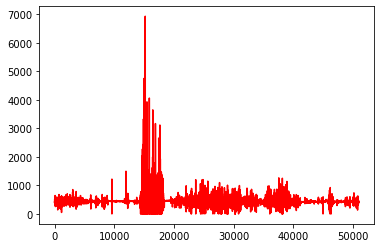

In [13]:
plt.plot(allConcData, 'r')
plt.show()

In [16]:
allUnixTime[0]

'1625532674'

In [ ]:
plt.plot(allWindSpeed[0:-1], 'o')
plt.plot()

In [ ]:
objects = []
import pickle
with (open("2019-08-22.pickle", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
os.getcwd()

In [ ]:
objects

In [ ]:
type(objects)

In [ ]:
objects[0]

In [ ]:
type(objects)
len(objects[0])

In [ ]:
print(objects[0])